# MNIST Handwritten digit classification


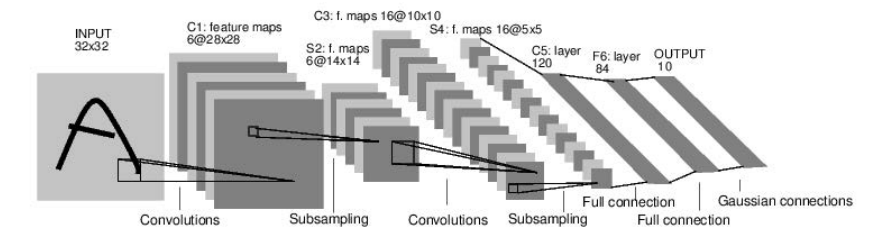

In [ ]:
# pip install visualkeras

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from keras.utils.np_utils import to_categorical
from keras.layers import Conv2D, Dense, Flatten,MaxPool2D
from keras.models import Sequential, Model
from keras.utils import  plot_model
from keras.callbacks import ModelCheckpoint , EarlyStopping
from keras.preprocessing.image import ImageDataGenerator

from itertools import product

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import visualkeras

import warnings
warnings.filterwarnings("ignore")


In [3]:
x_train = pd.read_csv('/content/drive/MyDrive/MNIST -CNN with Augmentation/train.csv')
x_test = pd.read_csv('/content/drive/MyDrive/MNIST -CNN with Augmentation/test.csv')

# MNIST data Analysis

In [4]:
x_train.head().style.background_gradient(cmap='Dark2_r')

In [5]:
x_train.describe().style.background_gradient(cmap='Dark2_r')

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

In [7]:
x_train.isnull().sum().sum()

0

In [8]:
x_test.isnull().sum().sum()

0

In [9]:
y_train = x_train['label']
x_train = x_train.drop(['label'],axis=1)

In [10]:
pd.Series(y_train).value_counts().rename_axis('Unique_values').to_frame('counts')

,counts
Unique_values,
1,4684
7,4401
3,4351
9,4188
2,4177
6,4137
0,4132
4,4072
8,4063


In [12]:
K = len(set(y_train))
print('number of classes:',K)

number of classes: 10


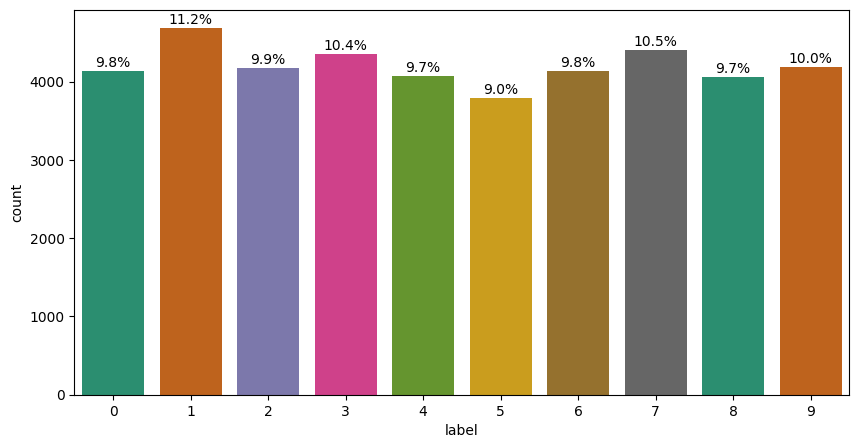

In [13]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x=y_train,palette = 'Dark2')
t = len(y_train)
for p in ax.patches:
  per = f'{100 * p.get_height() / t:.1f}%\n'
  x = p.get_x() + p.get_width() /2
  y = p.get_height()
  ax.annotate(per,(x,y), ha='center',va='center')
plt.show()

In [14]:
x_train.shape,x_test.shape

((42000, 784), (28000, 784))

In [15]:
x_train = x_train.values.reshape(-1,28,28,1)
x_test = x_test.values.reshape(-1,28,28,1)

In [16]:
x_train.shape,x_test.shape

((42000, 28, 28, 1), (28000, 28, 28, 1))

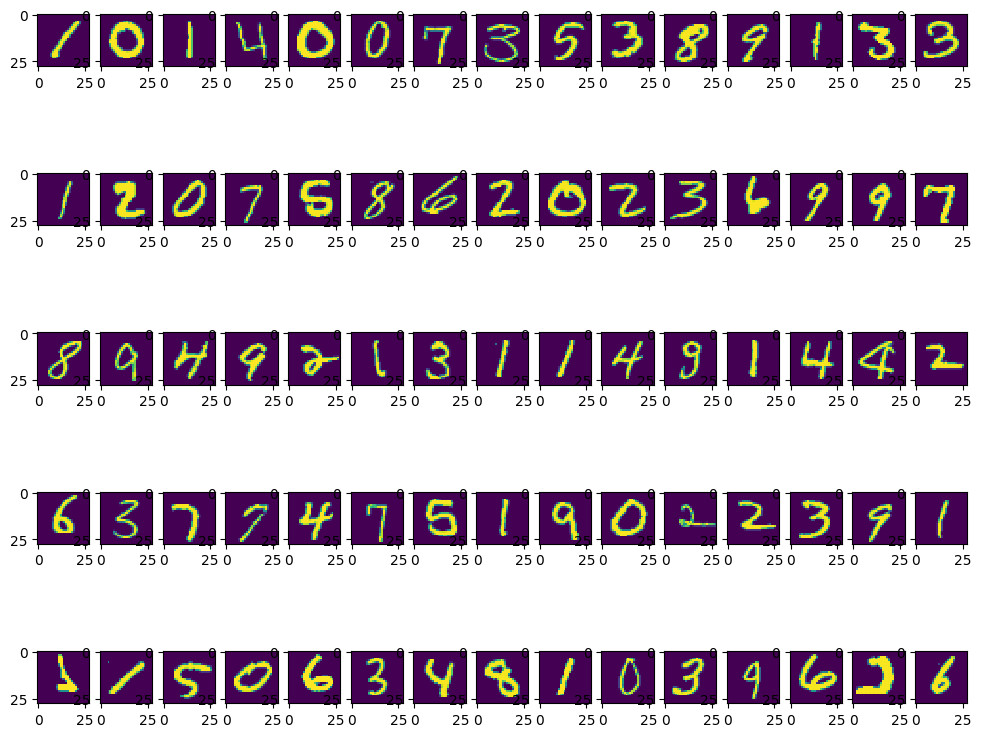

In [17]:
plt.figure(figsize=(12,10))
x, y = 15, 5
for i in range(75):
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i],interpolation='nearest')
plt.show()

Normalise the data

In [18]:
x_train = x_train/255
x_test = x_test/255

In [19]:
y_cat_train = to_categorical(y_train,K)

In [20]:
y_train.head(1)

0    1
Name: label, dtype: int64

In [22]:
print("\n Encoded y_train first row",y_cat_train[1])


 Encoded y_train first row [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [23]:
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val = train_test_split(x_train,y_cat_train,test_size=0.1,random_state=42)

#Model Creation

In [24]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

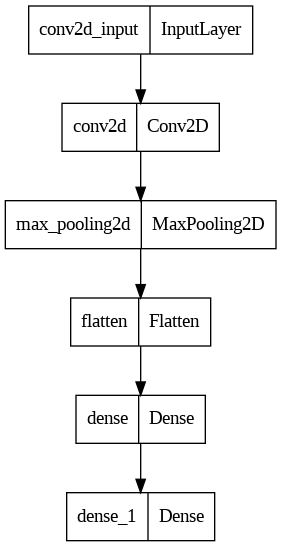

In [25]:
plot_model(model,to_file='/content/drive/MyDrive/MNIST -CNN with Augmentation/model.png')

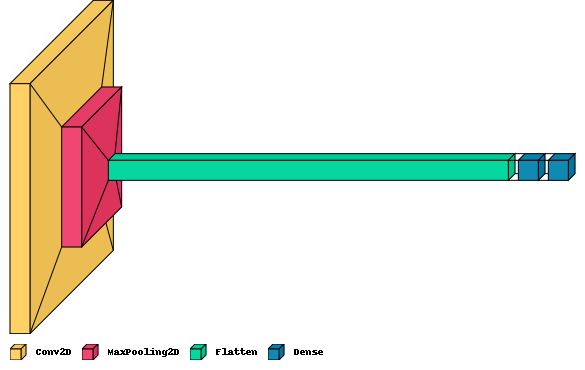

In [26]:
visualkeras.layered_view(model, scale_xy=10, legend=True)

In [27]:
model.fit(X_train,Y_train,validation_data=(X_val,Y_val),epochs=5)

Epoch 1/5
1182/1182 [==============================] - 32s 25ms/step - loss: 0.1818 - accuracy: 0.9451 - val_loss: 0.0669 - val_accuracy: 0.9795
Epoch 2/5
1182/1182 [==============================] - 29s 25ms/step - loss: 0.0575 - accuracy: 0.9824 - val_loss: 0.0566 - val_accuracy: 0.9824
Epoch 3/5
1182/1182 [==============================] - 31s 27ms/step - loss: 0.0380 - accuracy: 0.9886 - val_loss: 0.0507 - val_accuracy: 0.9836
Epoch 4/5
1182/1182 [==============================] - 29s 25ms/step - loss: 0.0253 - accuracy: 0.9925 - val_loss: 0.0479 - val_accuracy: 0.9855
Epoch 5/5
1182/1182 [==============================] - 29s 24ms/step - loss: 0.0188 - accuracy: 0.9940 - val_loss: 0.0579 - val_accuracy: 0.9831


In [30]:
score = model.evaluate(X_val,Y_val,verbose=10)

print('Loss is :',score[0],'\nTraining Accuracy is :',score[1])

Loss is : 0.05787989869713783 
Training Accuracy is : 0.9830952286720276


In [32]:
y_pred = model.predict(X_val)
y_val_hat = np.argmax(y_pred,axis=1)
y_val_org = np.argmax(Y_val,axis=1)

132/132 [==============================] - 1s 8ms/step


# Confusion Matrix

In [33]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Dark2):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, cm[i, j],
                  horizontalalignment="center",
                  color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


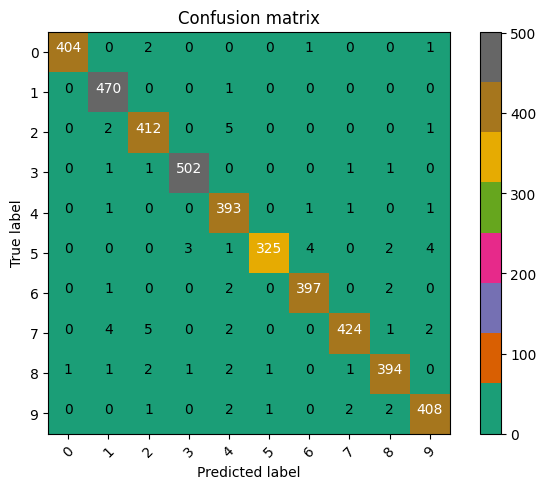

In [34]:
confusion_mtx = confusion_matrix(y_val_org, y_val_hat)
plot_confusion_matrix(confusion_mtx, classes = range(10))

# Classification Matrix

In [35]:
print(classification_report(y_val_org,y_val_hat))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       408
           1       0.98      1.00      0.99       471
           2       0.97      0.98      0.98       420
           3       0.99      0.99      0.99       506
           4       0.96      0.99      0.98       397
           5       0.99      0.96      0.98       339
           6       0.99      0.99      0.99       402
           7       0.99      0.97      0.98       438
           8       0.98      0.98      0.98       403
           9       0.98      0.98      0.98       416

    accuracy                           0.98      4200
   macro avg       0.98      0.98      0.98      4200
weighted avg       0.98      0.98      0.98      4200



# Augmentation

In [36]:
datagen  =  ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=0.0,
    horizontal_flip=True,
    vertical_flip=False)

datagen.fit(x_train)

In [37]:
checkpoint_callback = ModelCheckpoint(filepath='/content/drive/MyDrive/MNIST -CNN with Augmentation/CNN-logo.h5',
                      monitor='val_accuracy', mode='max', save_best_only=True)
earlystopping_callback = EarlyStopping(monitor='loss', patience=3)

In [38]:
batch_size = 100
steps = x_train.shape[0]//batch_size

In [39]:
train_generator = datagen.flow(X_train, Y_train, batch_size)
Val_generator = datagen.flow(X_val, Y_val, batch_size)

In [40]:
h = model.fit_generator(train_generator,validation_data=Val_generator,epochs=1,steps_per_epoch=steps,callbacks=[checkpoint_callback,earlystopping_callback])

378/420 [==========================>...] - ETA: 3s - loss: 0.6298 - accuracy: 0.8134

420/420 [==============================] - 41s 97ms/step - loss: 0.6298 - accuracy: 0.8134 - val_loss: 0.3119 - val_accuracy: 0.9021


In [41]:
res = model.predict(x_test)
res = np.argmax(res,axis = 1)
res = pd.Series(res, name="Label")
submission = pd.concat([pd.Series(range(1 ,28001) ,name = "ImageId"),   res],axis = 1)
submission.head(10)


875/875 [==============================] - 6s 6ms/step


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
5,6,9
6,7,0
7,8,3
8,9,0
9,10,3


In [42]:
submission.to_csv('/content/drive/MyDrive/MNIST -CNN with Augmentation/submission.csv',index=False)